In [76]:
""" 

                                                                                                    FUZZY LOGIC USING PYTHON PERFORMANCE SI UDIN JELEK BAGUS PREDIKSI

prediksi tinggi badan seseorang.

 linguistik tinggi badan : tinggi, medium, pendek
 linguistik berat badan:   berat,ringan

 konsekuensi : bagus, jelek, lumayan

 rules:

 IF tinggi AND berat   THEN ganteng
 IF medium AND berat   THEN ganteng
 IF medium AND ringan  THEN jelek
 IF pendek AND berat  THEN jelek
 IF pendek AND ringan THEN jelek         

library : scikit-learn (machine learning, AI)


input : udin memiliki tinggi sekitar 130 cm dan berat 40cm

"""

' \n\n                                                                                                    FUZZY LOGIC USING PYTHON PERFORMANCE SI UDIN JELEK BAGUS PREDIKSI\n\nprediksi tinggi badan seseorang.\n\n linguistik tinggi badan : tinggi, medium, pendek\n linguistik berat badan:   berat,ringan\n\n konsekuensi : bagus, jelek, lumayan\n\n rules:\n\n IF tinggi AND berat   THEN ganteng\n IF medium AND berat   THEN ganteng\n IF medium AND ringan  THEN jelek\n IF pendek AND berat  THEN jelek\n IF pendek AND ringan THEN jelek         \n\nlibrary : scikit-learn (machine learning, AI)\n\n\ninput : udin memiliki tinggi sekitar 130 cm dan berat 40cm\n\n'

In [1]:
pip install -U scikit-fuzzy 

     |████████████████████████████████| 1.0MB 21.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=2e6814d0d2678336da2f82601f818d240a67af38127760874d19cc6b38f19ea5
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
import skfuzzy as fuzzy

In [3]:
from skfuzzy import control as system

In [4]:
import numpy as np

In [17]:
tinggi_badan = system.Antecedent(np.arange(0,200,0.1), 'tinggi_badan')

In [18]:
tinggi_badan.universe

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.997e+02, 1.998e+02,
       1.999e+02])

In [29]:
berat_badan = system.Antecedent(np.arange(0,100,0.1), 'berat_badan')

In [48]:
performace = system.Consequent(np.arange(0,100,1), 'performance')

In [ ]:
""" membership function """

In [31]:
tinggi_badan['pendek'] = fuzzy.trapmf(tinggi_badan.universe, [0,0,120,140])

In [32]:
tinggi_badan['sedang'] = fuzzy.trimf(tinggi_badan.universe, [120,140,170])

In [33]:
tinggi_badan['tinggi'] = fuzzy.trapmf(tinggi_badan.universe, [140,170,200,200])

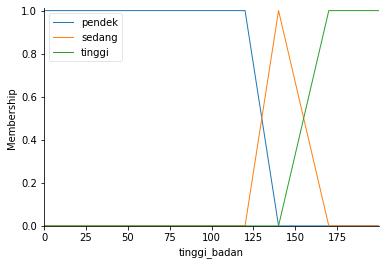

In [40]:
tinggi_badan.view()

In [34]:
berat_badan['ringan'] = fuzzy.trapmf(berat_badan.universe, [0,0,45,50])

In [35]:
berat_badan['lumayan'] = fuzzy.trimf(berat_badan.universe, [45,55,65])

In [36]:
berat_badan['berat_banget'] = fuzzy.trapmf(berat_badan.universe, [60,70,100,100])

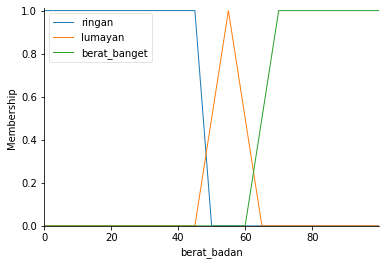

In [41]:
berat_badan.view()

In [50]:
performace['jelek'] = fuzzy.trapmf(performace.universe, [0,0,25,75])

In [51]:
performace['ganteng'] = fuzzy.trapmf(performace.universe, [25,75,100,100])

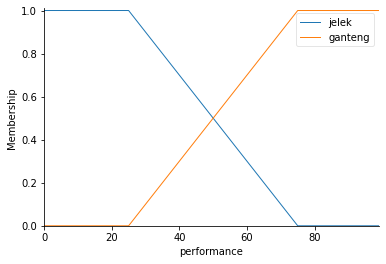

In [52]:
performace.view()

In [ ]:
""" rules """

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98802b78d0>)

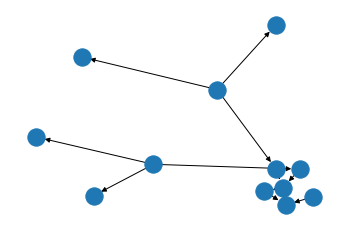

In [63]:
rules1 = system.Rule(tinggi_badan['tinggi'] & berat_badan['berat_banget'], performace['ganteng'])
rules1.view()

In [64]:
rules2 = system.Rule(tinggi_badan['tinggi'] & berat_badan['berat_banget'], performace['ganteng'])
rules3 = system.Rule(tinggi_badan['sedang'] & berat_badan['berat_banget'], performace['ganteng'])
rules4 = system.Rule(tinggi_badan['sedang'] & berat_badan['ringan'], performace['jelek'])
rules5 = system.Rule(tinggi_badan['pendek'] & berat_badan['berat_banget'], performace['jelek'])
rules6 = system.Rule(tinggi_badan['pendek'] & berat_badan['ringan'], performace['jelek'])


In [ ]:
""" input decision (keputusan)"""

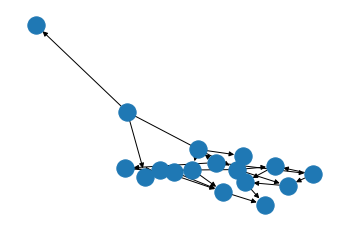

In [67]:
performace_control_udin = system.ControlSystem([rules1,rules2,rules3,rules4,rules5,rules6])
performace_control_udin.view()

In [71]:
performacepointsimulasi = system.ControlSystemSimulation(performace_control_udin)


In [73]:
performacepointsimulasi.input['berat_badan'] = 40
performacepointsimulasi.input['tinggi_badan'] = 110


In [74]:
performacepointsimulasi.compute()

performance si udin :  27.083333333333318


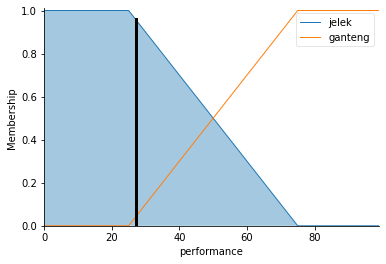

In [75]:
performace.view(sim=performacepointsimulasi)
print("performance si udin : ", performacepointsimulasi.output['performance'])